# California Housing Dataset Project - Elvis Matoya & Theodore Muhebwa

## Question Statement

* How do the various variables in the dataset interact with each other to affect `median_house_value`? For example, does the relationship between `median_income` and `median_house_value` depend on the age of the housing or the `ocean_proximity`?
* Use machine learning techniques to identify patterns in the data that are not immediately obvious? For example, can we use clustering algorithms to identify groups of neighborhoods with similar characteristics?


# California Housing Prices
## Source: Kaggle

**Features:**

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `median_house_value`: Median house value for households within a block (measured in US Dollars)
10. `ocean_proximity`: Location of the house w.r.t ocean/sea

In [122]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np 

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import statsmodels.api as sm
from scipy import stats

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
calidf = pd.read_csv('/Users/theoschool/Desktop/Advanced Data Analytics/cali housing.csv')

## Explarotory Data Analysis

In [125]:
calidf.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [126]:
calidf.shape

(20640, 10)

In [127]:
calidf.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [128]:
# Find unique values in the ocean proximity column
unique_values = calidf['ocean_proximity'].unique()
unique_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [129]:
# Create a sample dataframe
calidf_dummies = pd.DataFrame({'ocean_proximity': ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']})

# Split the categorical variable into dummy variables
calidf_dummies = pd.get_dummies(calidf['ocean_proximity'])

calidf = pd.concat([calidf, calidf_dummies], axis=1)

_In the first step, the code creates a new DataFrame called `calidf_dummies` with a single column named `ocean_proximity`, containing unique categories found in the original dataset. However, this step is not used in the following process, and it can be removed._

_The second step converts the `ocean_proximity` column from the original dataset into dummy variables using the `pd.get_dummies()` function. This function creates a new DataFrame with binary columns for each unique category in the `ocean_proximity` column. For each row, it sets the value to 1 for the column corresponding to the category of `ocean_proximity` and 0 for the other columns._

_Finally, the `pd.concat()` function is used to merge the original dataset with the new DataFrame containing the dummy variables. The `axis=1` parameter ensures that the new columns will be added to the original dataset, creating an expanded dataset that includes both the original columns and the new dummy variable columns._

_As a result, the categorical `ocean_proximity` column is transformed into a set of numerical columns, making it suitable for use in machine learning algorithms that require numerical data._

In [130]:
calidf.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value     <1H OCEAN        INLAND        ISLAND  \
count        20640.000000  20640.000000  20640.000000  20640.000000   
mean        206855.816909      0.442636      0.317393      0.000242   
std         115395.615874      0.496710      0.465473      0.015563   
min          14999.000000      0.000000      0.000000      0.000000   
25%         119600.000000      0.000000      0.000000      0.000000   
50%         179700.000000      0.000000      0.000000      0.000000   
75%         264725.000000      1.000000      1.000000      0.000000   
max         500001.000000      1.000000      1.000000      1.000000   

           NEAR BAY    NEAR OCEAN  
count  20640.000000  20640.000000  
mean       0.110950      0.128779  
std        0.314077      0.334963  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [131]:
calidf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

_From the output, it can be seen that there are no missing values in any column except for the `total_bedrooms` column, which has 207 missing values._

In [132]:
mean_value = calidf['total_bedrooms'].mean()
calidf['total_bedrooms'] = calidf['total_bedrooms'].fillna(mean_value)

_We calculate the mean value of the `total_bedrooms` column in the `calidf` DataFrame using the `mean()` function and stores it in the variable `mean_value`._

_This fills the missing values (null values) in the `total_bedrooms` column with the calculated mean value using the `fillna()` function. By doing this, it replaces the 207 missing values that were identified in the previous step with the mean value of the `total_bedrooms` column._

_By filling in the missing values with the mean value of the column, it allows for the preservation of the overall structure and distribution of the data while minimizing the impact of missing values on any subsequent analysis or modeling._

In [133]:
calidf.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

`calidf.isnull().sum()` _is run again to calculate the total number of missing (null) values in each column of the `calidf` DataFrame after filling the missing values in the `total_bedrooms` column with the mean value in the previous step.The output shows that there are no missing values in any of the columns now._

_This output indicates that the missing values in the `total_bedrooms` column have been successfully filled with the mean value, and the dataset is now complete with no missing values. This makes the dataset more suitable for further analysis or modeling, as the handling of missing values can prevent potential issues during these processes._

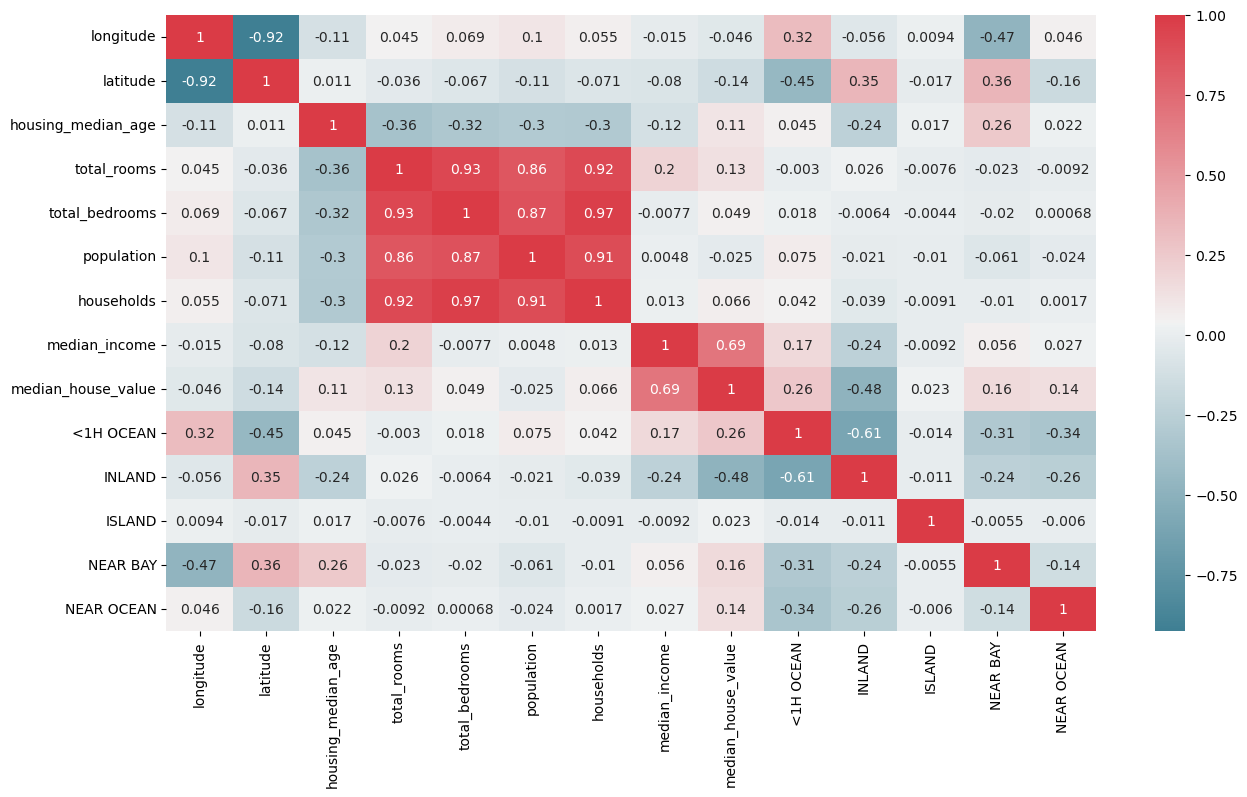

In [134]:
# Set up figure size
plt.figure(figsize=(15, 8))
sns.heatmap(calidf.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

_The heatmap above shows the correlation coefficients between each pair of variables in the dataset, with colors indicating the strength and direction of the correlation. Darker colors represent stronger correlations, while lighter colors represent weaker correlations. Positive correlations are shown in one color (blue), and negative correlations are shown in the opposite color (red)._

_The `median_income` variable has the highest correlation with `median_house_value`. This makes sense as people with higher incomes are able to afford more expensive houses._

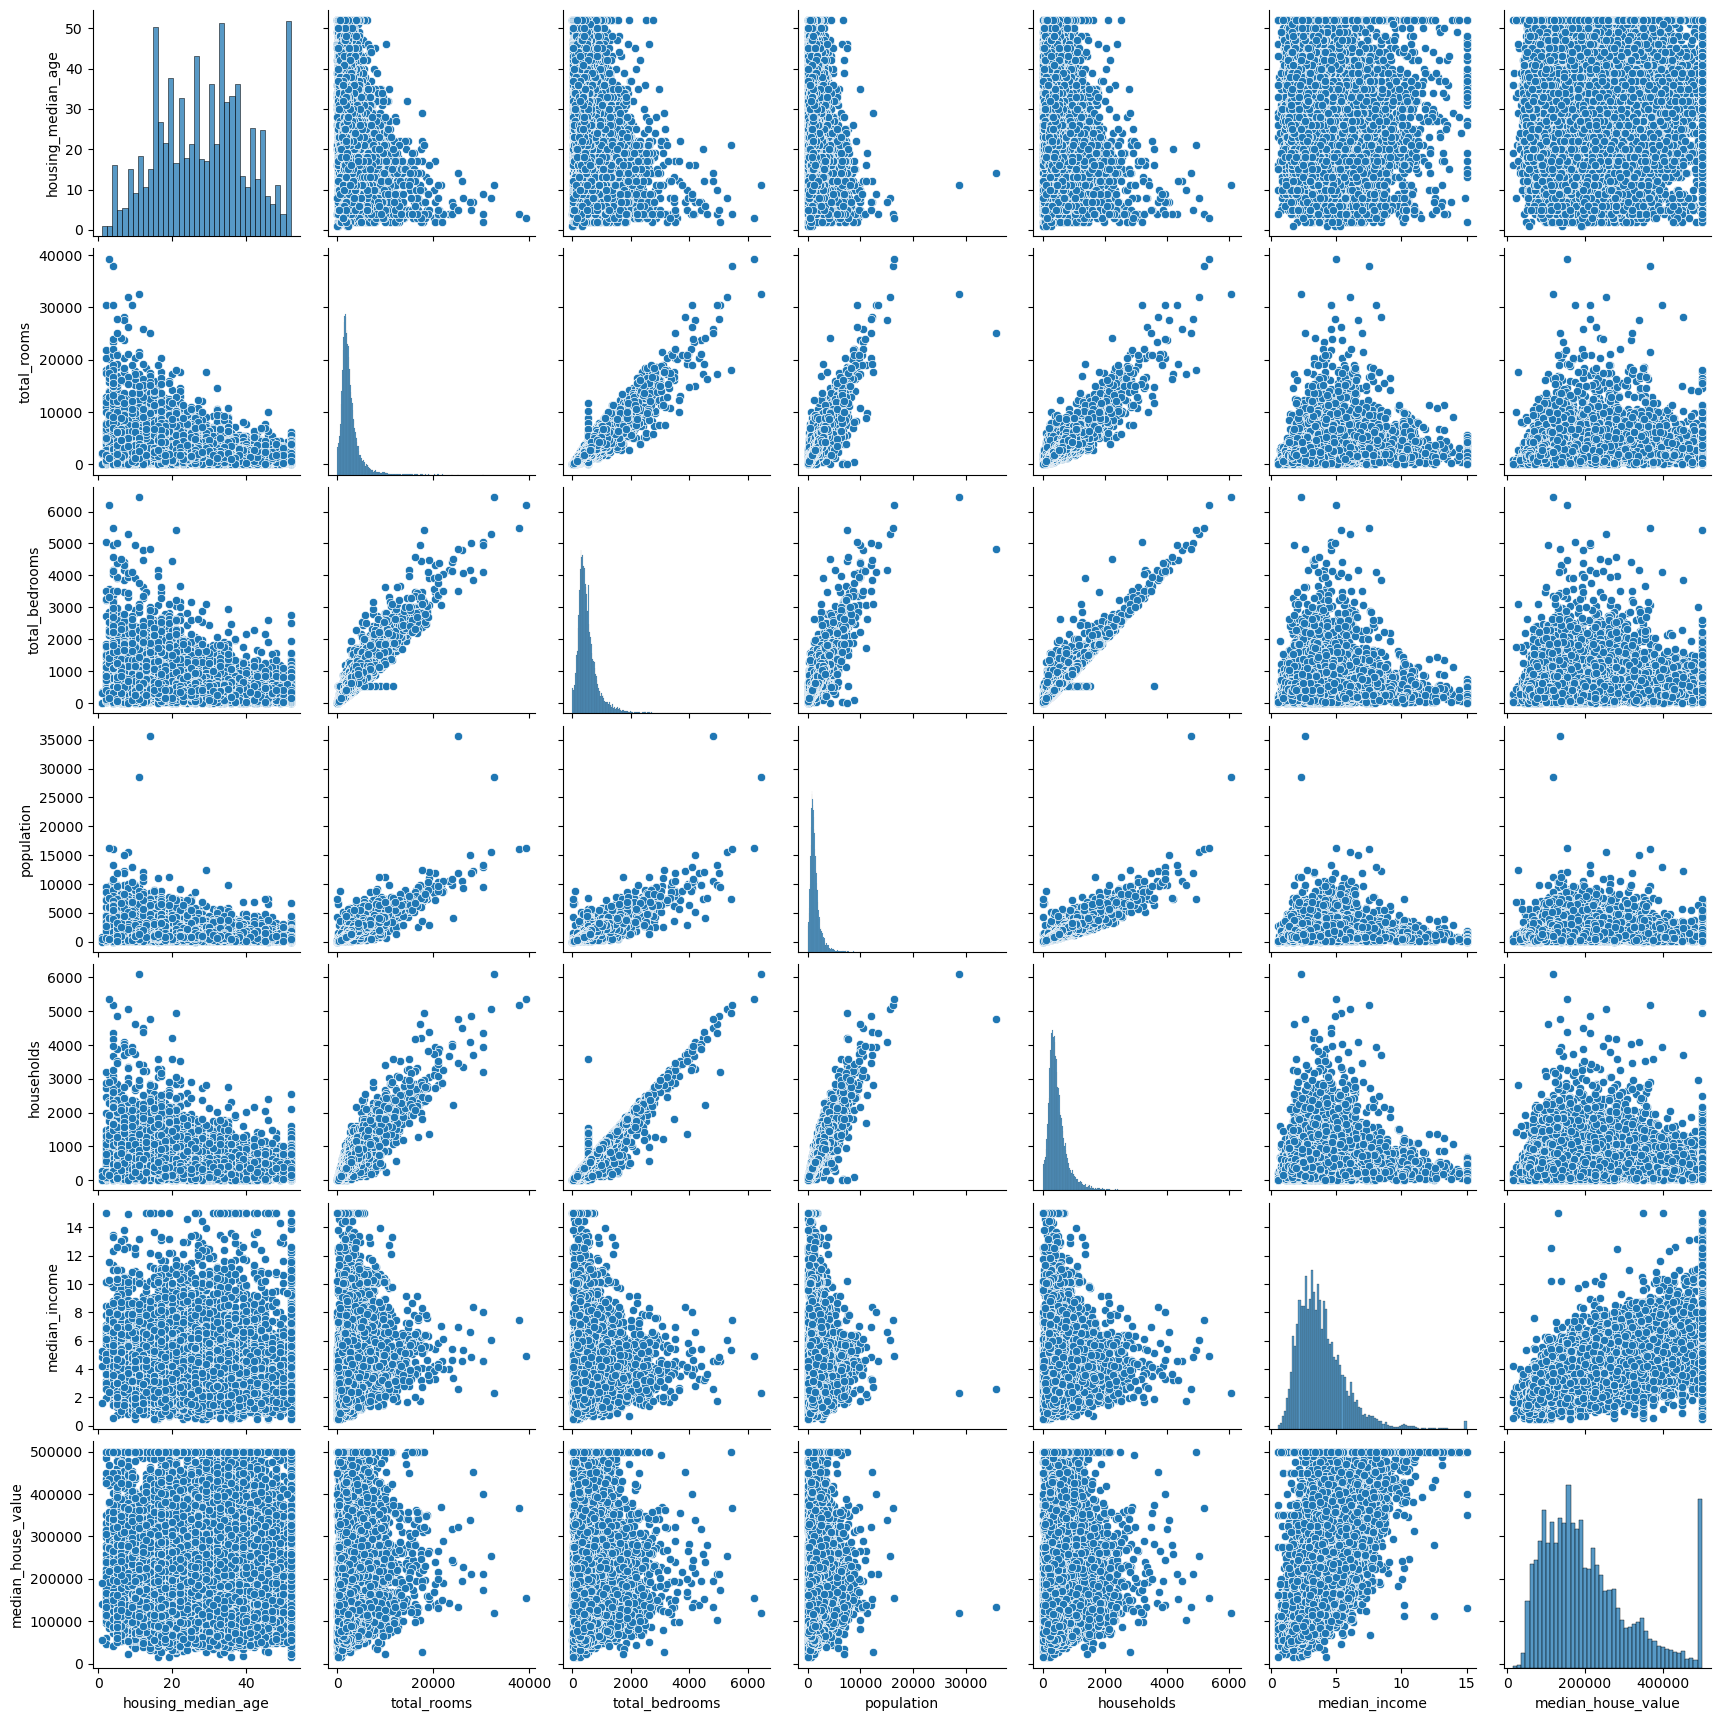

In [135]:
# Drop columns for pairplot
columns_to_drop = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','longitude','latitude']
calidfpairplot = calidf.drop(columns_to_drop,axis=1)
sns.pairplot(calidfpairplot)

_The pair plot visualization above enables the examination of the relationships among the variables in the `calidfpairplot` DataFrame. By excluding the dummy variables and geographical columns, the pair plot concentrates on the associations between the remaining numeric variables in the dataset, including `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, and `median_house_value`._

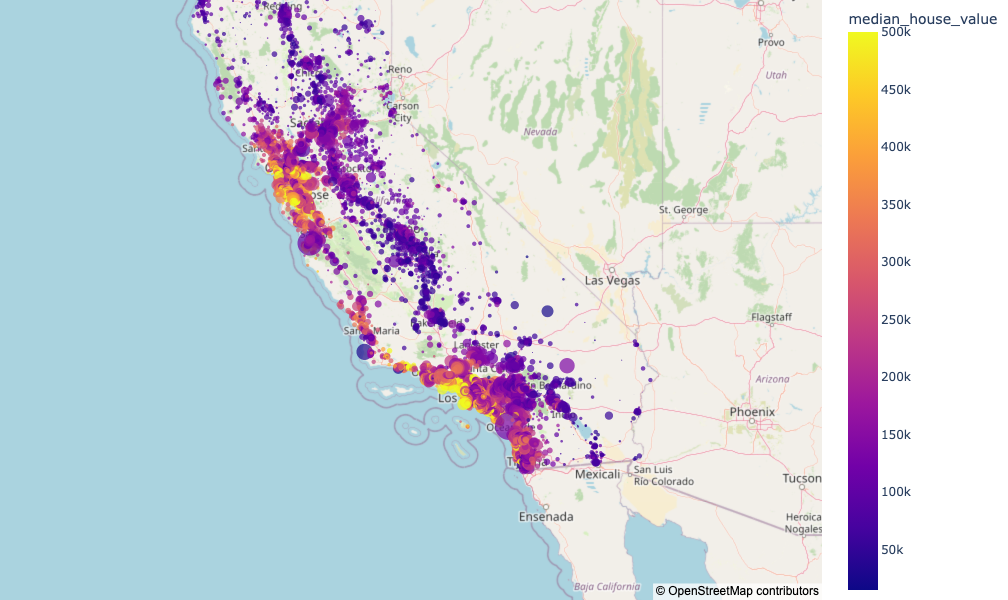

In [136]:
#Use longitude and latitude data to visually show trends geographically
fig = px.scatter_mapbox(calidf, lat="latitude", lon="longitude", color="median_house_value", size="population",
                        hover_name="ocean_proximity",
                        zoom=5, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

* The visualisations shows the state of California with a scatter plot where the size of each point showing the population in that particular location and the colour showing the value of median house value. The visualisation shows that the population closest to the ocean have the highest value and a denser population.

## Defining Characteristics of House Values

In [137]:
calidf.groupby(['ocean_proximity'])['median_house_value'].mean().round()

ocean_proximity
<1H OCEAN     240084.0
INLAND        124805.0
ISLAND        380440.0
NEAR BAY      259212.0
NEAR OCEAN    249434.0
Name: median_house_value, dtype: float64

_We can see that houses whose `ocean_proximity` is ISLAND exhibit the highest average median house value, followed by those NEAR BAY and NEAR OCEAN. Houses <1H OCEAN have moderately lower average median house values, while houses INLAND possess the lowest average median house values._

In [138]:
# Bin the median_income column
calidf['income_cat'] = pd.cut(calidf["median_income"], bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

# Calculate the average median_house_value for each bin
bin_values = calidf.groupby('income_cat')['median_house_value'].mean()

# Print the results
print(bin_values)

income_cat
1    112125.190998
2    136544.115940
3    199613.285240
4    258289.952459
5    378671.235394
Name: median_house_value, dtype: float64


_We can observe a clear trend: as the median income category increases, the average median house value also increases. This indicates a positive correlation between the median income of an area and the value of the houses in that area._

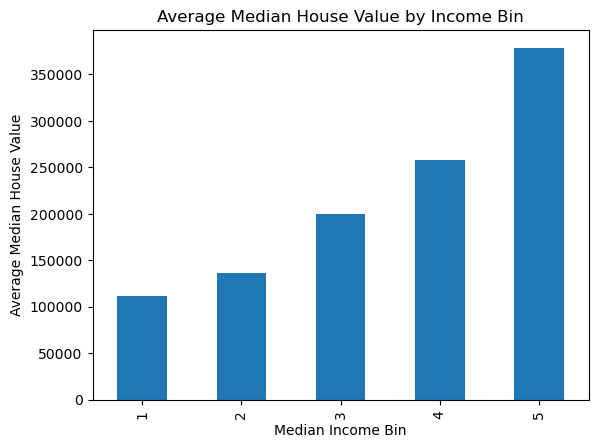

In [139]:
bin_values.plot(kind='bar')
plt.title('Average Median House Value by Income Bin')
plt.xlabel('Median Income Bin')
plt.ylabel('Average Median House Value')
plt.show()

_From the graph above, we can see a clear upward trend in the average median house value as the median income bin increases. The graph confirms the positive correlation between the median income of an area and the value of the houses in that area. This visualization makes it easier to comprehend and communicate the relationship between median income levels and house values._

## Regressions

In [140]:
calidf.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN income_cat  
0          0       0       0         1           0          5  
1          0       0       0         1           0          5  
2          0       0       0         1           0          5  
3          0       0       0         1           0          4  
4          0       0       0         1           0          3

#### Train-Test Split

In [141]:
columns_to_drop = ['median_house_value', 'ocean_proximity','longitude','latitude']

In [142]:
X = calidf.drop(columns_to_drop,axis=1)
y = calidf['median_house_value']/10

In [143]:
sc = StandardScaler()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fit the scaler to the training data
sc.fit(X_train)

# Transform the training and test data
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [145]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print('Linear Regression R-Squared:', r2)

Linear Regression R-Squared: 0.6303034594869737


_An R-squared value of 0.63 means that approximately 63% of the variability in the `median_house_value` can be explained by the independent variables included in the model._

In [146]:
# Perform 10-fold cross-validation on the scaled data
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=10)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())

Mean CV score: 0.6345061318901493


In [147]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2 = r2_score(y_test, rf_pred)
print('Random Forest Regressor R-Squared:', r2)

Random Forest Regressor R-Squared: 0.7035480627832695


_An R-squared value of 0.8026 means that approximately 70.35% of the variability in the `median_house_value` can be explained by the independent variables included in the model._

_This value is significantly higher than the R-squared value obtained for the linear regression model with standardized independent variables and train-test split (0.70). This indicates that the Random Forest Regressor model is better at capturing the underlying patterns in the data and has improved predictive performance compared to the linear regression model._

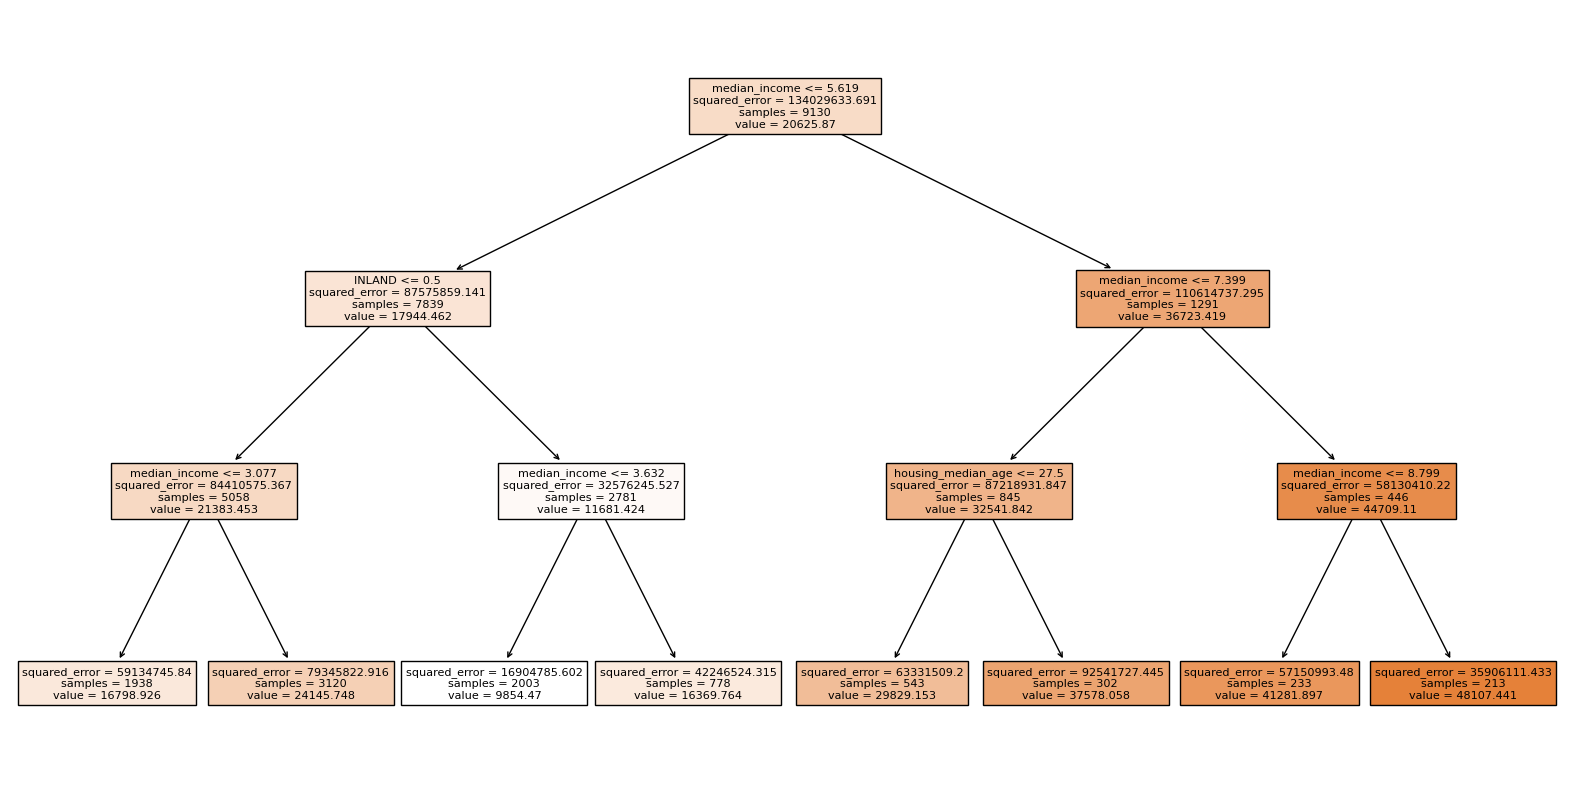

In [148]:
# Random Forest Regressor
rf = RandomForestRegressor(max_depth=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2 = r2_score(y_test, rf_pred)

# Extract the first decision tree from the forest
tree = rf.estimators_[0]

# Visualize the decision tree using the plot_tree function
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

_The above diagram is an example of the first 4 layers of how the decision tree works._  

## KNN

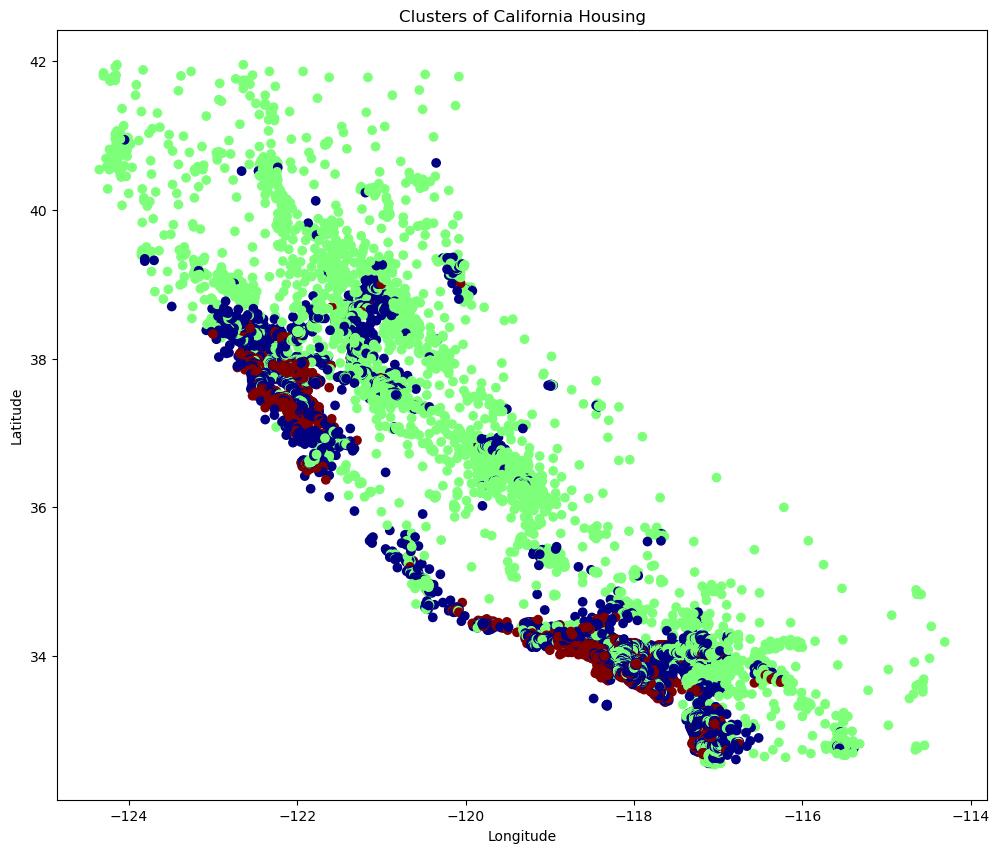

In [149]:
# Select the features for clustering
X = calidf[['median_income', 'median_house_value']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
calidf["cluster"] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(12, 10))
plt.scatter(calidf["longitude"], calidf["latitude"], c=calidf["cluster"], cmap="jet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters of California Housing")
plt.show()

_The cluster above helps us identify different clusters of median house values. Using 3 clusters shows that in both the north and the south of the state, INLAD housing is different to the housing close to the ocean. Doing furhter investigation to what other metrics can affect this cluster will be needed to be done._

## Analysis

_Seeing the median house value is greatest closer to the ocean, we will explore what variables drive the prices of the houses._

In [150]:
df1 = calidf.drop(columns = ['median_house_value', 'ocean_proximity'])
y = calidf['median_house_value']

In [151]:
df1['income_cat'] = df1['income_cat'].astype('int')

In [152]:
def OLS_Regression(X, y):
    lm = LinearRegression()
    lm.fit(X,y)
    params = lm.coef_
    predictions = lm.predict(X)
    variables = X.columns.tolist()

    newX = X
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    # print(newX)
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.iloc[0])))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,6)
    params = np.round(params,6)

    myDF3 = pd.DataFrame()
    myDF3['Variable'], myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [variables, params,sd_b,ts_b,p_values]
    return myDF3
# Probabilities < .05 is significant at CL .95

def backward_elimination(X, y):
    alpha = .15
    output = OLS_Regression(X, y)
    while(X.shape[1] > 0):
        if(output['Probabilities'].max() < alpha):
            return output
        else:
            dropvar = output.loc[output['Probabilities'] == output['Probabilities'].max(), 'Variable'].tolist()[0]
            X = X.drop(dropvar, axis = 1)
            output = OLS_Regression(X, y)
def forward_selection(X, y, existed_variable, Candidate):
    alpha = .15
    prob = 1
    var = Candidate[0]
    for variable in Candidate:
        test = existed_variable
        test.append(variable)
        result = OLS_Regression(df1[test], y)
        p_temp = result.loc[result['Variable'] == variable, 'Probabilities'].values[0]
        test.remove(variable)
        if p_temp < prob:
            prob = p_temp
            var = variable
            print(prob)
            print(var)
    if prob < alpha:
        print(prob)
        existed_variable = list(set(existed_variable).union([var]))
        Candidate = list(set(Candidate) - set([var]))
    return(existed_variable, Candidate)

import copy

def stepwise(X, y):
    existed_variable = []
    Candidate = X.columns.tolist()
    full = copy.deepcopy(Candidate)
    while(Candidate):
        before = len(Candidate)
        print(before)
        existed_variable, Candidate = forward_selection(X[existed_variable], y, existed_variable, Candidate)
        after = len(Candidate)
        print(after)
        noforward = (before == after)
        # print(noforward)
        X1 = X[existed_variable]
        output = backward_elimination(X1, y)
        X2 = X1[output['Variable'].tolist()]
        noback = (X2.shape == X1.shape)
        Candidate = list(set(full) - set(X2.columns.tolist()))
        existed_variable = X2.columns.tolist()
        # print(X2.columns.tolist())
        # print(len(Candidate))
        print(noback)
        print(noforward)
        print(len(Candidate))
        if noback and noforward:
            return X2
    return X2

In [153]:
a = stepwise(df1, y)

15
0.0
longitude
0.0
14
True
False
14
14
0.0
total_rooms
0.0
13
True
False
13
13
0.0
cluster
0.0
12
True
False
12
12
0.0
population
0.0
11
True
False
11
11
3e-06
households
0.0
INLAND
0.0
10
True
False
10
10
0.0
households
0.0
9
True
False
9
9
0.0
latitude
0.0
8
True
False
8
8
0.0
income_cat
0.0
7
True
False
7
7
0.381085
NEAR BAY
0.0
ISLAND
0.0
6
True
False
6
6
0.363704
NEAR BAY
0.0
median_income
0.0
5
True
False
5
5
0.206767
NEAR BAY
0.051915
<1H OCEAN
0.0
total_bedrooms
0.0
4
True
False
4
4
0.258763
NEAR BAY
0.074766
<1H OCEAN
0.0
housing_median_age
0.0
3
True
False
3
3
0.000976
NEAR BAY
0.000976
2
True
False
2
2
0.024459
NEAR OCEAN
0.023879
<1H OCEAN
0.023879
1
True
False
1
1
0.794647
NEAR OCEAN
1
True
True
1


_Above is the stepwise regression process using forward selection and backward elimination methods to find the most significant variables affecting the median house value. In each iteration, the forward selection is performed, where the most significant variable is added to the model among the remaining candidate variables. After each forward selection, the backward elimination is performed to remove the least significant variable from the model if its p-value is greater than the specified alpha (0.15 in this case)._

_The process continues until no more variables can be added or removed from the model. The output displays the step-by-step process of forward selection and backward elimination. At each step, we can see the number of remaining candidate variables, the p-value of the most significant variable being added, and the name of the variable being added to the model. After performing the stepwise regression, the final model includes the following significant variables: `longitude`, `NEAR OCEAN`, `INLAND`, `cluster`, `housing_median_age`, `<1H OCEAN`, `income_cat`, `population`, `median_income`, `households`, `NEAR BAY`, `latitude`, `total_rooms`, and `total_bedrooms`._

_This suggests that these variables significantly contribute to the median house value and should be included in the model for better prediction performance._

In [154]:
# Select records with ocean_proximity values of "NEAR BAY", "NEAR OCEAN", and "<1H OCEAN"
filtered_data = calidf[(calidf['ocean_proximity'] == 'NEAR BAY') | (calidf['ocean_proximity'] == 'NEAR OCEAN') | (calidf['ocean_proximity'] == '<1H OCEAN')]
filtered_data.shape


(14084, 17)

In [155]:
columns_to_drop = ['median_house_value', 'ocean_proximity','longitude','latitude','INLAND','ISLAND','income_cat','cluster']

In [156]:
X = filtered_data.drop(columns_to_drop,axis=1)
y = filtered_data['median_house_value']/10

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fit the scaler to the training data
sc.fit(X_train)

# Transform the training and test data
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [158]:
lr = LinearRegression()
lr.fit(X,y)

print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lr.coef_}))

intercept  1439.709026595825
            Predictor  coefficient
0  housing_median_age   155.279556
1         total_rooms    -0.654574
2      total_bedrooms     6.928716
3          population    -4.517960
4          households    11.564363
5       median_income  4082.691831
6           <1H OCEAN  -434.794614
7            NEAR BAY  -437.629771
8          NEAR OCEAN   872.424385


_After the data was scaled, we performed a regression. When focused on properties close to the ocean, we see thatin comparison to the other proximities, `NEAR OCEAN` is the only variable that increases the median house value. To see if there are any interactions with the variables, we created a `population_income_interaction` term to see if any of these variables give a better understanding of our regression. Visually, we saw that these higher priced houses were located in densely populated areas and exploring if the population and income can give a better understanding._

In [159]:
filtered_data['population_income_interaction'] = filtered_data['population'] * filtered_data['median_income']

In [160]:
X = filtered_data.drop(columns_to_drop,axis=1)
X['population_income_interaction'] = filtered_data['population'] * filtered_data['median_income']
y = filtered_data['median_house_value']/10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lr.coef_}))


intercept  24465.053235950494
                       Predictor  coefficient
0             housing_median_age  1941.819877
1                    total_rooms -1123.584495
2                 total_bedrooms  2928.657271
3                     population -4920.536061
4                     households  4023.177607
5                  median_income  8231.377501
6                      <1H OCEAN  -203.109122
7                       NEAR BAY  -198.197754
8                     NEAR OCEAN   437.426747
9  population_income_interaction  -188.412595


_The interaction term `population_income_interaction` has a negative coefficient, which indicates that as the interaction between population and median income increases, the median house value tends to decrease. This is an interesting finding and may suggest that areas with high population density and low median income are less desirable and therefore have lower median house values._

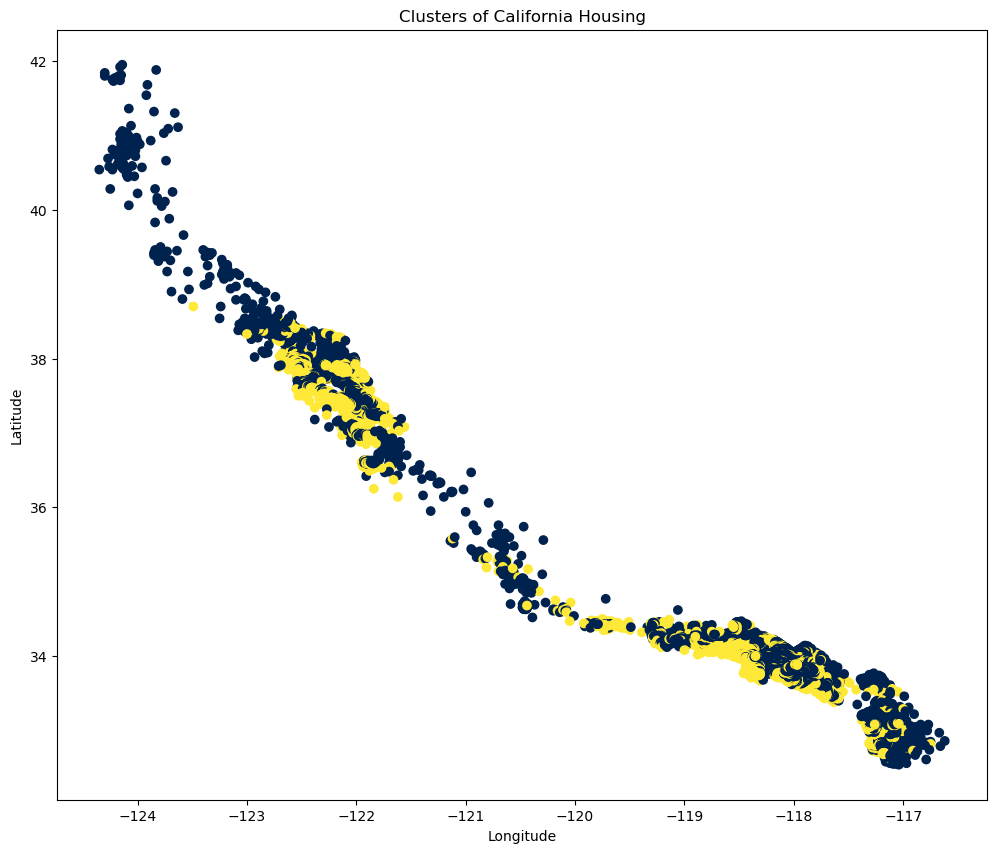

In [165]:
# Select the features for clustering
X = filtered_data[['median_house_value']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
filtered_data["cluster"] = kmeans.labels_

# Visualize the clusters and their centers
plt.figure(figsize=(12, 10))
plt.scatter(filtered_data["longitude"], filtered_data["latitude"], c=filtered_data["cluster"], cmap="cividis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters of California Housing")
plt.show()

_The plot shows housing in the Bay Area has a cluster of showing people of a different income concentrated in one area, whereas South California seems to have a general mix of incomes spread throughout. Using n_clusters of 5 shows the CBD's of these San Francisco, San Diego, and Los Angeles, are clustered in the same colour which could represent high valued houses._

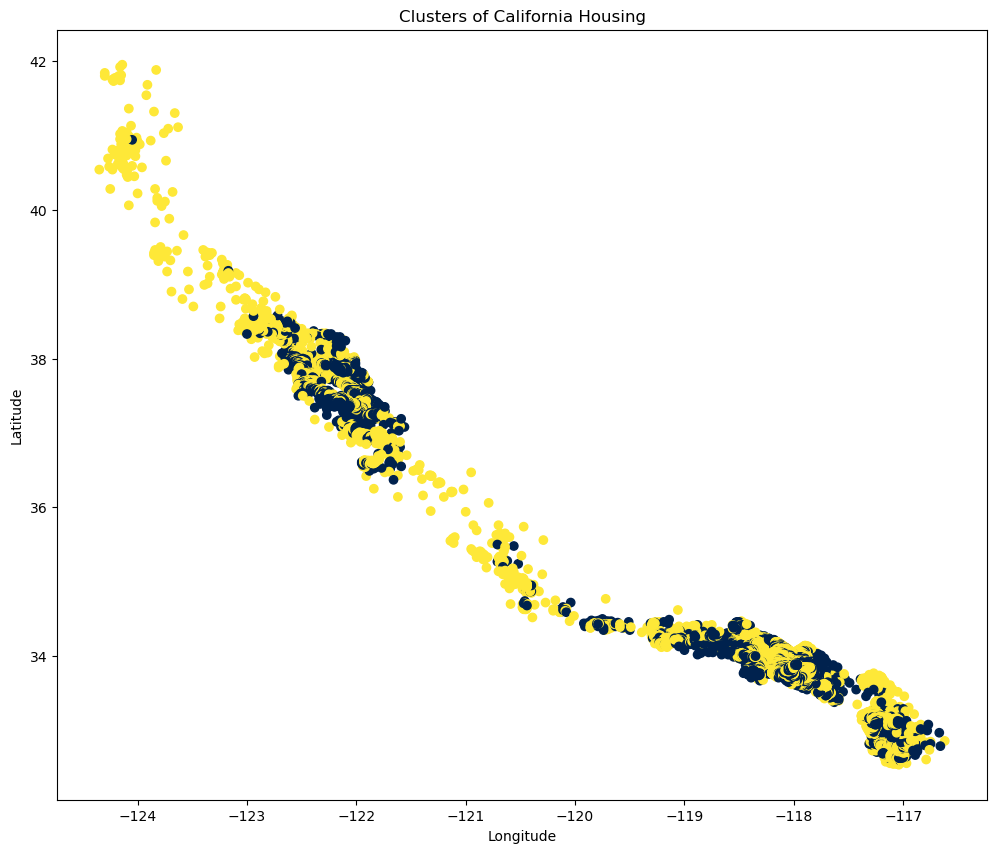

In [166]:
# Select the features for clustering
X = filtered_data[['median_income']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
filtered_data["cluster"] = kmeans.labels_

# Visualize the clusters and their centers
plt.figure(figsize=(12, 10))
plt.scatter(filtered_data["longitude"], filtered_data["latitude"], c=filtered_data["cluster"],cmap="cividis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters of California Housing")
plt.show()

_The two plots identify two clusters that define `median_house_value` and `median_income`. We are seeing a trend that agrees with our hypothesis of people living in certain areas have a high income and it correlates with a high house value. There is an outlier on the second plot and that can be attributed to someone with a high income having a holdiay home away from CBD's_

### NEAR OCEAN Characteristics

                      count           mean            std      min       25%  \
ocean_proximity_num                                                            
0                    9136.0  240084.285464  106124.292213  17500.0  164100.0   
1                    2658.0  249433.977427  122477.145927  22500.0  150000.0   
2                    2290.0  259212.311790  122818.537064  22500.0  162500.0   

                          50%       75%       max  
ocean_proximity_num                                
0                    214850.0  289100.0  500001.0  
1                    229450.0  322750.0  500001.0  
2                    233800.0  345700.0  500001.0  


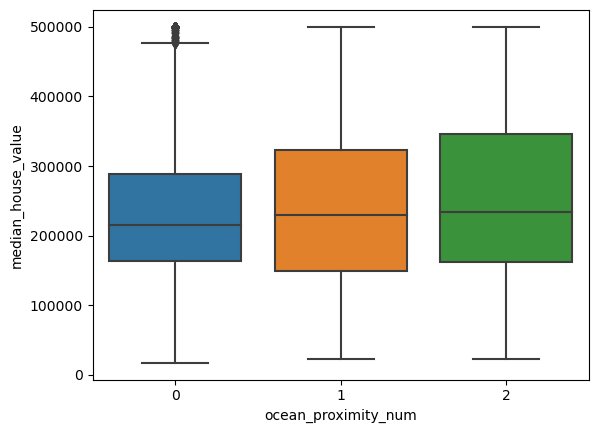

In [163]:
# Create a new column that maps ocean_proximity to a numeric value
filtered_data['ocean_proximity_num'] = filtered_data['ocean_proximity'].map({'<1H OCEAN': 0, 'NEAR OCEAN': 1, 'NEAR BAY': 2})

# Create a boxplot of median_house_value for each category of ocean_proximity
sns.boxplot(x='ocean_proximity_num', y='median_house_value', data=filtered_data)

# Get the numerical data for each box
box_data = filtered_data.groupby('ocean_proximity_num')['median_house_value'].describe()

# Print the boxplot data
print(box_data)

_The `median_house_value` has a higher median with NEAR BAY houses in comparison to NEAR OCEAN houses. It is important to note that there are few outliers with the <1H OCEAN houses._

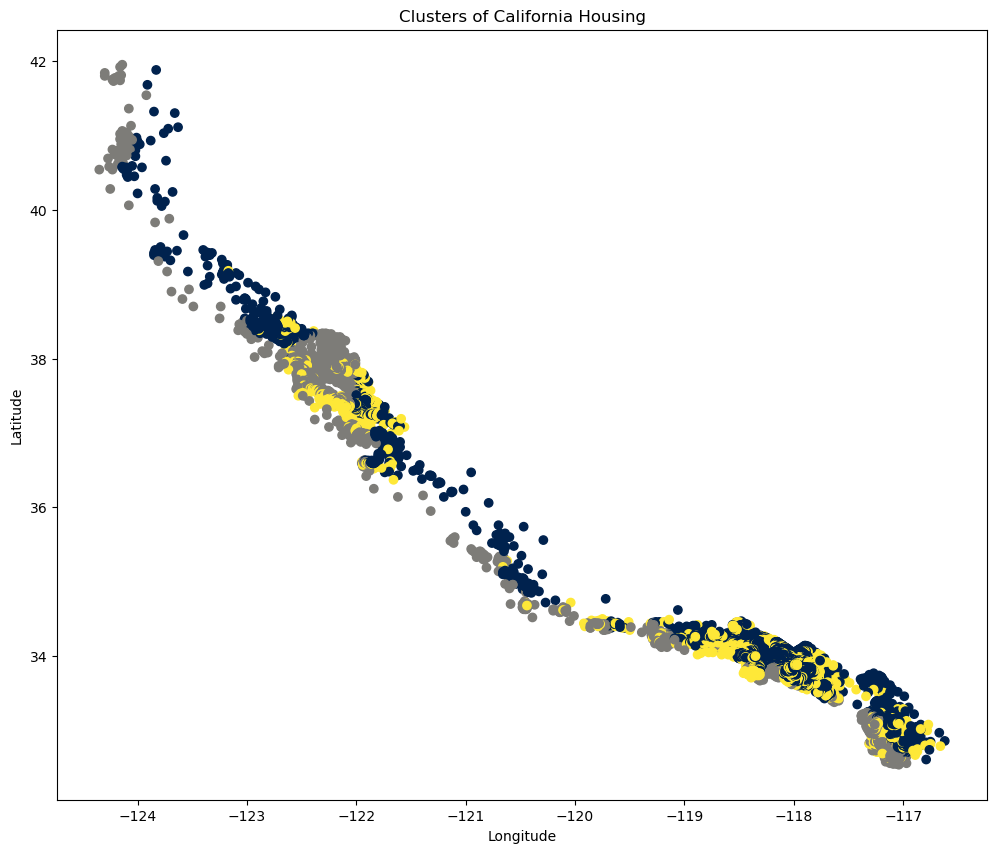

In [164]:
# Select the features for clustering
X = filtered_data[['median_income','ocean_proximity_num']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
filtered_data["cluster"] = kmeans.labels_

# Visualize the clusters and their centers
plt.figure(figsize=(12, 10))
plt.scatter(filtered_data["longitude"], filtered_data["latitude"], c=filtered_data["cluster"],cmap="cividis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters of California Housing")
plt.show()

_We are now creating clusters of ocean proximity and median income and see how they are clustered. There seems to be a trend of the densely populated areas with the colour yellow representing the higher income earners, the grey being people with slightly lower median incomes but still value properties with them being closer to the ocean and the blue being other wise with majority of the points being by further from the ocean._

## Conclusion

_It is evident that extensive analysis on the California Housing data has been done. Through our analysis, we have identified various trends that wouldn't have been noticed by plainly inspecting the data. We believe that the tools utilzed as well as the insights derived show a firm understanding of the concepts learned in throughout the semester._